In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Matching

Trong OpenCV, việc ghép cặp giữa các keypoint có thể được thực hiện bằng phương pháp vét cạn, brute force xét khoảng cách giữa mọi cặp điểm thông qua lớp `BFMatcher`. Khi khởi tạo bằng, hai tham số có thể truyền vào là:
* `normType` - loại khoảng cách metric giữa các description (descriptor) của keypoint (`NORM_L1`,`NORM_L2` cho SIFT, SURF và `NORM_HAMMING` cho ORB)
* `crossCheck` - nếu truyền giá trị `False` thì với mỗi query descriptor sẽ được gán với $k$ train descriptor gần nhất. Ngược lại, nếu truyền `True`, thì mỗi query sẽ được gán với $1$ train descriptor gần nhất

Việc ghép cặp được thực hiện thông qua hai hàm `match` - ghép cặp tốt nhất và `knnMatch` - ghép $k$ cặp tốt nhất cho mỗi query descriptor. Sau khi thực hiện, hàm trả về một danh sách gồm các thực thể thuộc lớp `DMatch` có các thuộc tính sau:
* `distance` - khoảng cách giữa cặp ghép descriptor được tính theo metric `normType`
* `queryIdx` - chỉ số index của query descriptor
* `trainIdx` - chỉ số index của train descriptor
* `imgIdx` - chỉ số index của train image

#### ORB

(-0.5, 2489.5, 1511.5, -0.5)

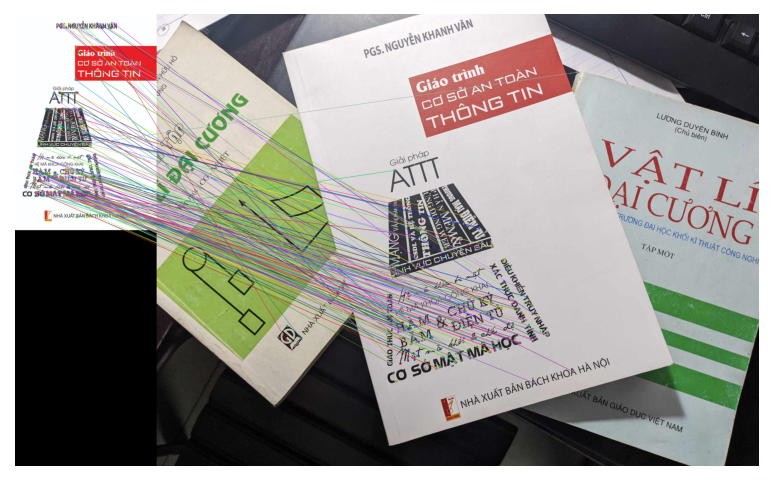

In [2]:
img1 = cv.imread('../images/cover.jpg') # query image
img2 = cv.imread('../images/books.jpg') # train image

orb = cv.ORB_create() # khởi tạo lớp thuật toán ORB
kp1, des1 = orb.detectAndCompute(img1, None) # phát hiện các đặc trưng, keypoints ORB trong query image
kp2, des2 = orb.detectAndCompute(img2, None) # phát hiện các đặc trưng, keypoints ORB trong train image

bf = cv.BFMatcher(normType=cv.NORM_HAMMING, crossCheck=True) # khởi tạo lớp thuật toán ghép cặp với metric Hamming
matches = bf.match(des1, des2) # query descriptor tương ứng với des1, train descriptor tương ứng với des2

# vẽ các ghép cặp giữa hai ảnh
img3 = cv.drawMatches(img1, kp1, img2, kp2, matches, None)

plt.rcParams['figure.dpi'] = 150
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.axis("off")

#### SIFT


(-0.5, 2489.5, 1511.5, -0.5)

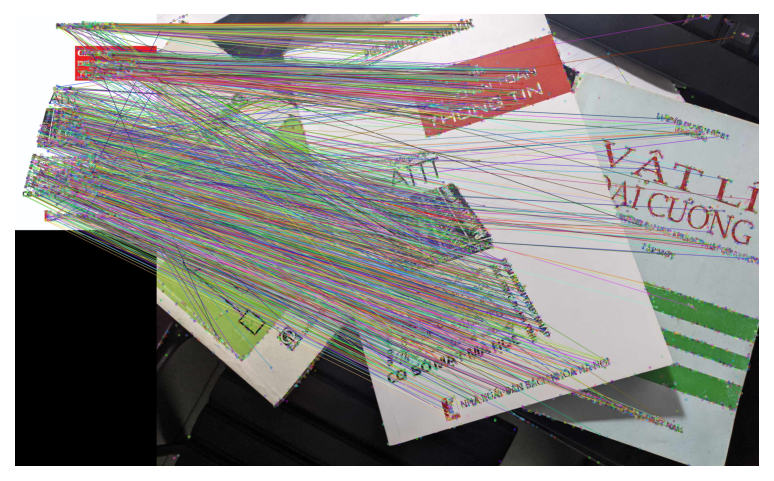

In [3]:
img1 = cv.imread('../images/cover.jpg') # query image
img2 = cv.imread('../images/books.jpg') # train image

sift = cv.SIFT_create() # khởi tạo lớp thuật toán SIFT
kp1, des1 = sift.detectAndCompute(img1, None) # phát hiện các đặc trưng, keypoints SIFT trong query image
kp2, des2 = sift.detectAndCompute(img2, None) # phát hiện các đặc trưng, keypoints SIFT trong train image

bf = cv.BFMatcher() # khởi tạo lớp thuật toán ghép cặp với metric mặc định NORM_L2
matches = bf.match(des1, des2) # query descriptor tương ứng với des1, train descriptor tương ứng với des2

# vẽ các ghép cặp giữa hai ảnh
img3 = cv.drawMatches(img1, kp1, img2, kp2, matches, None)

plt.rcParams['figure.dpi'] = 150
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.axis("off")

#### SIFT ratio test

Kỹ thuật giúp tránh các ghép cặp giữa các descriptor của các patch ảnh có tính chất lặp đi lặp lại. Chỉ thực hiện việc ghép cặp $u$ và $v$ nếu distance giữa $u$ và $v$ nhỏ hơn nhiều so với train descriptor gần thứ nhì. 

(-0.5, 2489.5, 1511.5, -0.5)

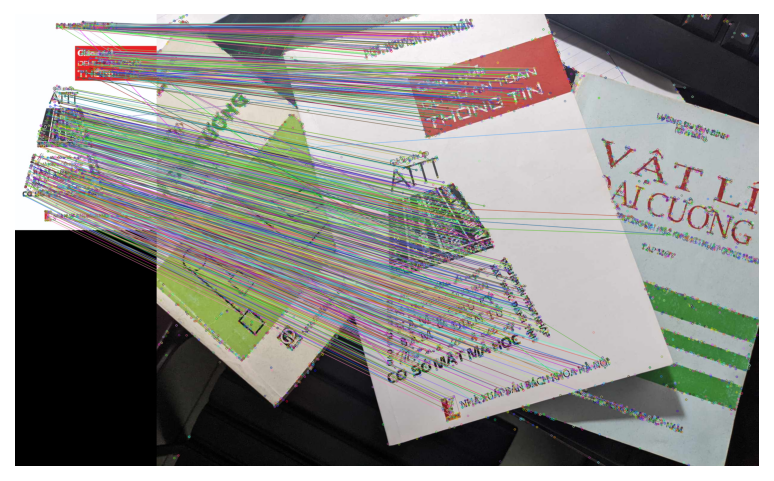

In [4]:
img1 = cv.imread('../images/cover.jpg') # query image
img2 = cv.imread('../images/books.jpg') # train image

sift = cv.SIFT_create() # khởi tạo lớp thuật toán SIFT
kp1, des1 = sift.detectAndCompute(img1, None) # phát hiện các đặc trưng, keypoints SIFT trong query image
kp2, des2 = sift.detectAndCompute(img2, None) # phát hiện các đặc trưng, keypoints SIFT trong train image

bf = cv.BFMatcher() # khởi tạo lớp thuật toán ghép cặp với metric mặc định NORM_L2
matches = bf.knnMatch(des1, des2, k=2) # mỗi query descriptor ghép với hai train descriptor gần nhất
                                       # trả về danh sách gồm các tuple, mỗi tuple gồm k DMatch tương ứng với k cặp ghép cho query descriptor

good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)

# vẽ các ghép cặp giữa hai ảnh
img3 = cv.drawMatches(img1, kp1, img2, kp2, good, None)

plt.rcParams['figure.dpi'] = 150
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.axis("off")

## FLANN

FLANN (Fast Library for Approximate Nearest Neighbour) là phương pháp ghép cặp tìm hàng xóm gần nhất bằng cách sử dụng các thuật toán tìm kiếm nhanh lân cận gần nhất mà không phải duyệt toàn bộ brute force. Phương pháp này sẽ hiệu quả hơn so với brute force khi làm việc với bộ dữ liệu lớn có nhiều keypoint.

Tương tự như trên nhưng thay vì ghép cặp thông qua lớp `BFMatcher` thì thực hiện ghép cặp qua lớp `FlannBasedMatcher`

(-0.5, 2489.5, 1511.5, -0.5)

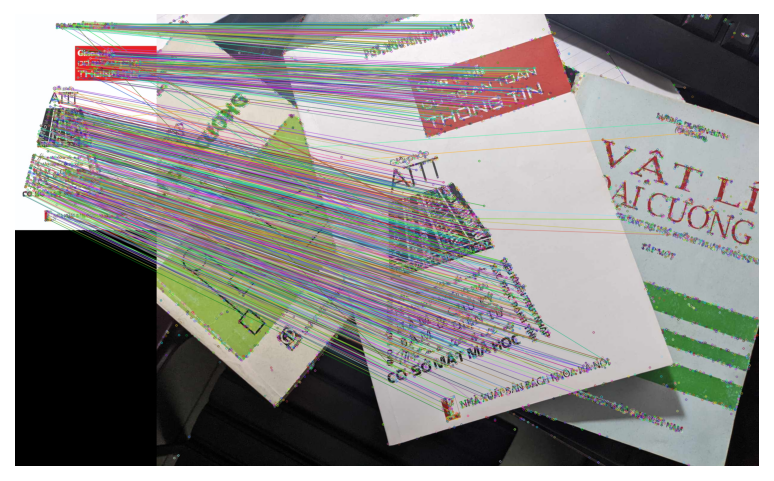

In [5]:
img1 = cv.imread('../images/cover.jpg') # query image
img2 = cv.imread('../images/books.jpg') # train image

sift = cv.SIFT_create() # khởi tạo lớp thuật toán SIFT
kp1, des1 = sift.detectAndCompute(img1, None) # phát hiện các đặc trưng, keypoints SIFT trong query image
kp2, des2 = sift.detectAndCompute(img2, None) # phát hiện các đặc trưng, keypoints SIFT trong train image


# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) # or pass empty dictionary
 
flann = cv.FlannBasedMatcher(index_params,search_params) # khởi tạo lớp phương pháp FLANN với tham số khởi tạo trên
matches = flann.knnMatch(des1, des2, k=2) # mỗi query descriptor ghép với hai train descriptor gần nhất
                                          # trả về danh sách gồm các tuple, mỗi tuple gồm k DMatch tương ứng với k cặp ghép cho query descriptor

good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)

# vẽ các ghép cặp giữa hai ảnh
img3 = cv.drawMatches(img1, kp1, img2, kp2, good, None)

plt.rcParams['figure.dpi'] = 150
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.axis("off")